In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
chunksize = 20000
df = pd.read_csv('USCensus1990.data.txt', chunksize = chunksize, iterator = True)
data = pd.concat(df, ignore_index = True)

In [3]:
data.shape

(2458285, 69)

In [4]:
data.head()

,caseid,dAge,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,...,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,iYearwrk,dYrsserv
0,10000,5,0,1,0,0,5,3,2,2,...,0,5,0,2,1,1,0,11,1,0
1,10001,6,1,1,0,0,7,5,2,2,...,0,1,0,2,1,1,0,5,1,0
2,10002,3,1,2,0,0,7,4,2,2,...,0,2,0,2,1,1,0,10,1,0
3,10003,4,1,2,0,0,1,3,2,2,...,0,1,0,1,1,1,0,10,1,0
4,10004,7,1,1,0,0,0,0,2,2,...,3,0,0,0,2,2,0,5,6,0


In [5]:
data.columns

Index(['caseid', 'dAge', 'dAncstry1', 'dAncstry2', 'iAvail', 'iCitizen',
       'iClass', 'dDepart', 'iDisabl1', 'iDisabl2', 'iEnglish', 'iFeb55',
       'iFertil', 'dHispanic', 'dHour89', 'dHours', 'iImmigr', 'dIncome1',
       'dIncome2', 'dIncome3', 'dIncome4', 'dIncome5', 'dIncome6', 'dIncome7',
       'dIncome8', 'dIndustry', 'iKorean', 'iLang1', 'iLooking', 'iMarital',
       'iMay75880', 'iMeans', 'iMilitary', 'iMobility', 'iMobillim', 'dOccup',
       'iOthrserv', 'iPerscare', 'dPOB', 'dPoverty', 'dPwgt1', 'iRagechld',
       'dRearning', 'iRelat1', 'iRelat2', 'iRemplpar', 'iRiders', 'iRlabor',
       'iRownchld', 'dRpincome', 'iRPOB', 'iRrelchld', 'iRspouse', 'iRvetserv',
       'iSchool', 'iSept80', 'iSex', 'iSubfam1', 'iSubfam2', 'iTmpabsnt',
       'dTravtime', 'iVietnam', 'dWeek89', 'iWork89', 'iWorklwk', 'iWWII',
       'iYearsch', 'iYearwrk', 'dYrsserv'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2458285 entries, 0 to 2458284
Data columns (total 69 columns):
caseid       int64
dAge         int64
dAncstry1    int64
dAncstry2    int64
iAvail       int64
iCitizen     int64
iClass       int64
dDepart      int64
iDisabl1     int64
iDisabl2     int64
iEnglish     int64
iFeb55       int64
iFertil      int64
dHispanic    int64
dHour89      int64
dHours       int64
iImmigr      int64
dIncome1     int64
dIncome2     int64
dIncome3     int64
dIncome4     int64
dIncome5     int64
dIncome6     int64
dIncome7     int64
dIncome8     int64
dIndustry    int64
iKorean      int64
iLang1       int64
iLooking     int64
iMarital     int64
iMay75880    int64
iMeans       int64
iMilitary    int64
iMobility    int64
iMobillim    int64
dOccup       int64
iOthrserv    int64
iPerscare    int64
dPOB         int64
dPoverty     int64
dPwgt1       int64
iRagechld    int64
dRearning    int64
iRelat1      int64
iRelat2      int64
iRemplpar    int64
iRiders      

In [7]:
df = data.sample(frac = 0.1)

In [8]:
df.shape

(245828, 69)

In [9]:
df.describe()

,caseid,dAge,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,...,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,iYearwrk,dYrsserv
count,2.458280e+05,245828.000000,245828.000000,245828.000000,245828.000000,245828.000000,245828.000000,245828.000000,245828.000000,245828.000000,...,245828.000000,245828.000000,245828.000000,245828.000000,245828.000000,245828.000000,245828.000000,245828.000000,245828.000000,245828.000000
mean,1.239166e+06,3.850936,3.284492,1.573747,0.121577,0.287425,1.241466,1.396122,1.434592,1.466953,...,0.792469,1.482834,0.033946,0.832078,1.000651,1.095054,0.038014,8.457291,1.818133,0.139382
std,7.093896e+05,2.047043,4.034293,1.690524,0.673052,0.965232,1.764628,1.762070,0.843956,0.845842,...,1.308051,1.964103,0.181092,0.859220,0.683513,0.743726,0.191231,4.080139,2.106344,0.403825
min,1.000700e+04,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.252342e+05,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,5.000000,1.000000,0.000000
50%,1.239532e+06,4.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,10.000000,1.000000,0.000000
75%,1.854267e+06,6.000000,3.000000,2.000000,0.000000,0.000000,1.000000,3.000000,2.000000,2.000000,...,3.000000,3.000000,0.000000,2.000000,1.000000,2.000000,0.000000,11.000000,2.000000,0.000000
max,2.468282e+06,7.000000,11.000000,12.000000,4.000000,4.000000,9.000000,5.000000,2.000000,2.000000,...,3.000000,6.000000,1.000000,2.000000,2.000000,2.000000,1.000000,17.000000,7.000000,2.000000


In [10]:
df.isnull().any()

caseid       False
dAge         False
dAncstry1    False
dAncstry2    False
iAvail       False
             ...  
iWorklwk     False
iWWII        False
iYearsch     False
iYearwrk     False
dYrsserv     False
Length: 69, dtype: bool

In [11]:
df.isnull().any().any()

False

In [12]:
df.drop(['caseid'], axis =1, inplace = True)

In [13]:
df.head()

,dAge,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,iEnglish,...,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,iYearwrk,dYrsserv
1222986,6,9,1,0,3,3,4,2,2,1,...,0,6,0,1,1,1,0,9,1,0
1493782,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
2321288,2,0,1,4,0,1,0,2,2,0,...,3,0,0,1,1,2,0,7,2,0
2089401,6,7,1,0,0,3,0,2,2,0,...,3,0,0,0,2,2,0,15,4,0
2335609,7,11,2,0,0,0,0,2,2,0,...,3,0,0,0,2,2,0,10,5,0


In [16]:
df['dAge'].unique()

array([6, 1, 2, 7, 3, 5, 4, 0])

In [17]:
for col in list(df):
    print(col)
    print(df[col].unique())
    print(50 * '-')

dAge
[6 1 2 7 3 5 4 0]
--------------------------------------------------
dAncstry1
[ 9  1  0  7 11  3  2  4  8  6 10  5]
--------------------------------------------------
dAncstry2
[ 1  2  3 12  4 10  7 11  5  6  8  9]
--------------------------------------------------
iAvail
[0 4 3 2 1]
--------------------------------------------------
iCitizen
[3 0 4 2 1]
--------------------------------------------------
iClass
[3 0 1 5 6 2 7 4 8 9]
--------------------------------------------------
dDepart
[4 0 5 1 3 2]
--------------------------------------------------
iDisabl1
[2 0 1]
--------------------------------------------------
iDisabl2
[2 0 1]
--------------------------------------------------
iEnglish
[1 0 2 3 4]
--------------------------------------------------
iFeb55
[0 1]
--------------------------------------------------
iFertil
[ 2  0  3  4  1  5  6  7  8  9 13 10 11 12]
--------------------------------------------------
dHispanic
[0 9 3 2 7 6 4 8 1 5]
--------------------------

In [22]:
wcss = [ ]
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 30, n_init = 5, random_state = 0)
    km.fit(df.values)
    wcss.append(km.inertia_)

In [27]:
wcss

[1111926403.627512,
 183914777.57371408,
 61548697.53422993,
 39517511.088540174,
 33464881.53844903,
 30466379.820005123,
 28001711.19306783,
 26524985.494740743,
 25110491.313358806,
 24652215.877167407]

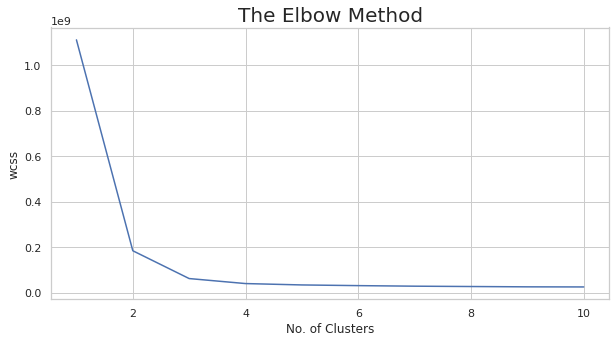

In [26]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [29]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 30, n_init = 5, random_state = 0)
y_means = km.fit_predict(df.values)

In [31]:
len(y_means)

245828

In [32]:
len(df)

245828